# Задание в модуле PYTHON-13 "Визуализация данных"

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_df = churn_data.drop('RowNumber', axis=1, inplace=False) # создадим копию базы данных и удалим бесполезный столбец
churn_df['Exited_word'] = churn_df['Exited'].apply(lambda x: 'Лояльные' if x == 0 else 'Ушедшие') # добавим столбец с понятными обозначениями для осей графиков

### Столбцы таблицы:

1. CustomerId — идентификатор клиента
2. Surname — фамилия клиента
3. CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
4. Geography — страна клиента (банк международный)
5. Gender — пол клиента
6. Age — возраст клиента
7. Tenure — сколько лет клиент пользуется услугами банка
8. Balance — баланс на счетах клиента в банке
9. NumOfProducts — количество услуг банка, которые приобрёл клиент
10. HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
11. IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
12. EstimatedSalary — предполагаемая заработная плата клиента
13. Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

## Задание 9.1  
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

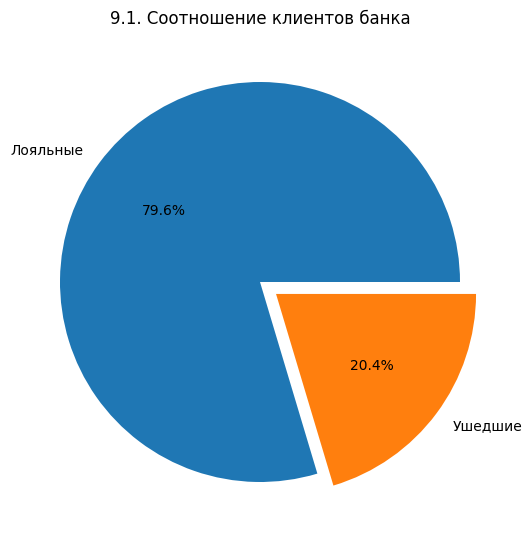

In [3]:
# Посчитаем количество лояльных и ушедших клиентов в процентном соотношении
client_type = churn_df['Exited_word'].value_counts(normalize=True)

# Построим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('9.1. Соотношение клиентов банка')
axes.pie(
    client_type,
    labels=client_type.index,
    autopct='%.1f%%',
    explode=[0, 0.1]
);

### Ответ на задание 9.1  
Менее четверти всех клиентов банка ушли из него, что, с точки зрения количества, свидетельствует о достаточно высоком уровне удержания и/или об успешной политике привлечения новых клиентов. 

---

## Задание 9.2  
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

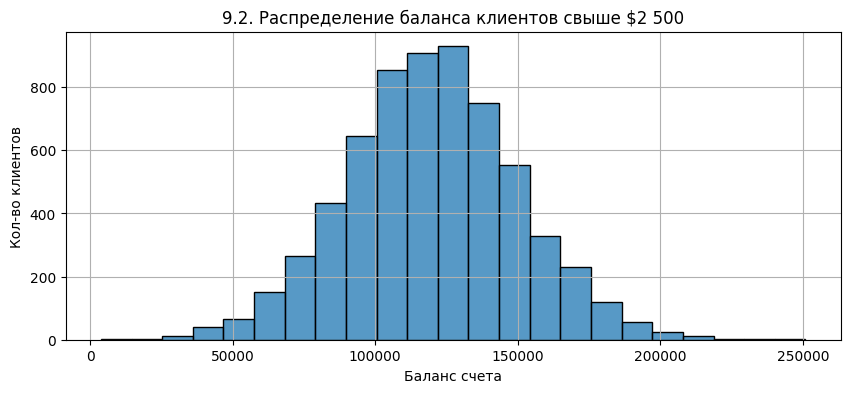

In [4]:
# Сохраним группу клиентов с балансом свыше $2500
churn_df_2500 = churn_df[churn_data['Balance'] > 2500]

# Построим гистограмму
fig = plt.figure(figsize=(10, 4))
histplot = sns.histplot(
    data=churn_df_2500,
    x='Balance',
    bins=23
)

histplot.set_title('9.2. Распределение баланса клиентов свыше $2 500');
histplot.set_xlabel('Баланс счета');
histplot.set_ylabel('Кол-во клиентов');
histplot.grid()

### Ответ на задание 9.2  
Распределение похоже на нормальное.  
Примерно у половины клиентов банка с балансом счета свыше \$2 500 накопления составляют от $100 тыс. до $140 тыс.  
Среднее значение баланса при этом находится на уровне $120 тыс.  
К аномалиям можно отнести минимальную сумму счета в размере $3,8 тыс., а также максимальную - в размере $250 тыс.  
Можно сделать вывод, что целевой аудиторией банка является средний класс.

---

## Задание 9.3  
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

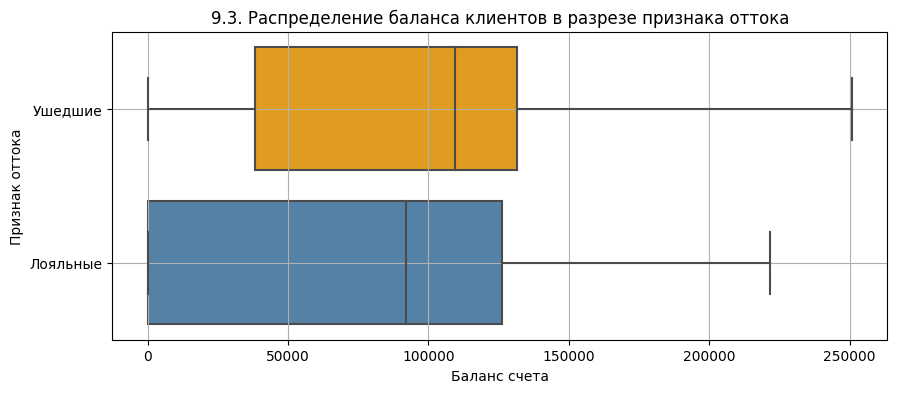

In [5]:
# Построим коробчатую диаграмму
fig = plt.figure(figsize=(10, 4))
boxplot = sns.boxplot(
    data=churn_df,
    x='Balance',
    y='Exited_word',
    orient='h',
    palette=['orange', 'steelblue']
)

boxplot.set_title('9.3. Распределение баланса клиентов в разрезе признака оттока');
boxplot.set_xlabel('Баланс счета');
boxplot.set_ylabel('Признак оттока');
boxplot.grid()

### Ответ на задание 9.3  
На диаграмме видно, что суммы на счетах ушедших клиентов превышают суммы лояльных. Это относится и к медианному, и максимальному показателю. При этом ширина ящика для ушедших клиентов меньше за счет того, что у наименее состоятельной четверти ушедших клиентов на счету было свыше $38 тыс., тогда как у наименее состоятельной четверти лояльных клиентов на счету - ноль.  

Уходу клиентов и закрытию счетов могли способствовать пять основных причин:  
1. У клиента была цель накопить определенную сумму денег, например, для: 1) первоначального взноса на покупку собственного жилья, 2) открытия бизнеса или 3) оплаты обучения детям. Цель была достигнута: сумма накоплена, выведена со счета, а счет закрыт. В данном случае клиента устраивали предоставляемые банком услуги, следовательно данная причина не отвечает поставленному в задаче вопросу и должна быть отсеяна (хотя принимать ее во внимание стоит, чтобы не пытаться улучшить и без того хороший сервис).
2. Схожая с первой. Клиент, получив кредит (на крупную покупку или инвестицию) в начале своего сотрудничества с банком, выплачивал его и прекращал сотрудничество. За время выплаты размер депозита увеличивался, что подтверждает более высокие показатели группы ушедших клиентов по сравнению с лояльными. Состоятельные клиенты приходят в банк с уже имеющейся финансовой подушкой, чтобы получить кредит на реализацию крупных целей, тогда как менее состоятельные открывают счет для накопления сбережений. Этим обусловливается нулевой баланс у части лояльной аудитории. И в этом случае тоже причина ухода не связана с недовольством услугами банка и может не учитываться. Напротив, это может быть свидетельством низких ставок по кредитам, что привлекает состоятельных клиентов!
3. Банк предоставляет хорошие процентные ставки по депозитам до $100 тыс., являясь хорошим "стартовым" банком для молодых специалистов, которые начинают строить карьеру и копить деньги. Однако ставки для депозитов свыше $100 тыс. оказываются менее выгодными, чем у банков-конкурентов, в результате чего, состоятельные клиенты предпочитают не терять прибыль и перевести свои накполения в другие банки. В этом случае банку стоит пересмотреть ставки по депозитам свыше $100 тыс.
4. Состоятельные клиенты (одновременно с этим и более зрелые по возрасту, чего не видно на данной диаграмме, но подтверждается другими способами разведывательного анализа) желают получать более качественный сервис и дополнительные бонусы за хранение своих денег, например, приоритетное обслуживание, консьерж-сервис, доступ в бизнес-залы в аэропортах и проч. Видимо, банк не предоставляет подобных возможностей, в результате чего, ценящие себя клиенты переводят свои накопления в банки-конкуренты. Банку стоит удостовериться, что состоятельные клиенты обслуживаются по высшему разряду.  
5. Закрытие счета у состоятельных клиентов может также обуславливаться переходом на высокую должность или в другую компанию, со сменой зарплатного проекта и банка. В таком случае клиенту удобнее получать зарплату и хранить накопления в одном банке, поэтому он переводит все свои сбережения в другой банк. В данном случае банку стоит сравнить свои условия работы с корпоративными клиентами, зарплатные программы с аналогичными у банков-конкурентов, и удостовериться, что он идет в ногу со временем.

---

## Задание 9.4  
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

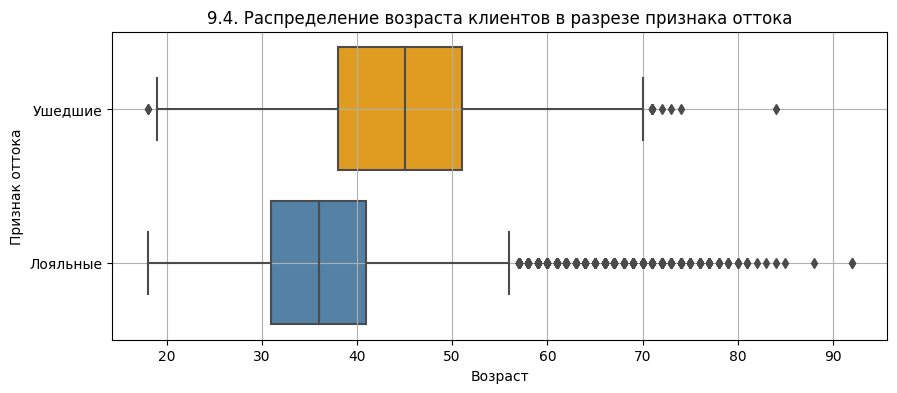

In [6]:
# Построим коробчатую диаграмму
fig = plt.figure(figsize=(10, 4))
boxplot = sns.boxplot(
    data=churn_df,
    x='Age',
    y='Exited_word',
    orient='h',
    palette=['orange', 'steelblue']
)

boxplot.set_title('9.4. Распределение возраста клиентов в разрезе признака оттока');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Признак оттока');
boxplot.grid()

### Ответ на задание 9.4  
Основная масса лояльных клиентов имеет возраст от 18 до 56 лет с ядром от 31 до 41 года. Именно в группе лояльных клиентов наблюдается наибольшее количество выбросов: незначительное число клиентов зрелого и преклонного возраста.  

Среди ушедших клиентов наибольший интерес представляет ядро группы - люди от 38 до 51 года и в особенности в возрасте от 45 до 51. Это состоятельные клиенты с балансом счета от $100 тыс. до $140 тыс., о которых шла речь выше. На эту категорию банку стоит обратить повышенное внимание с целью их удержания.

---

## Задание 9.5  
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

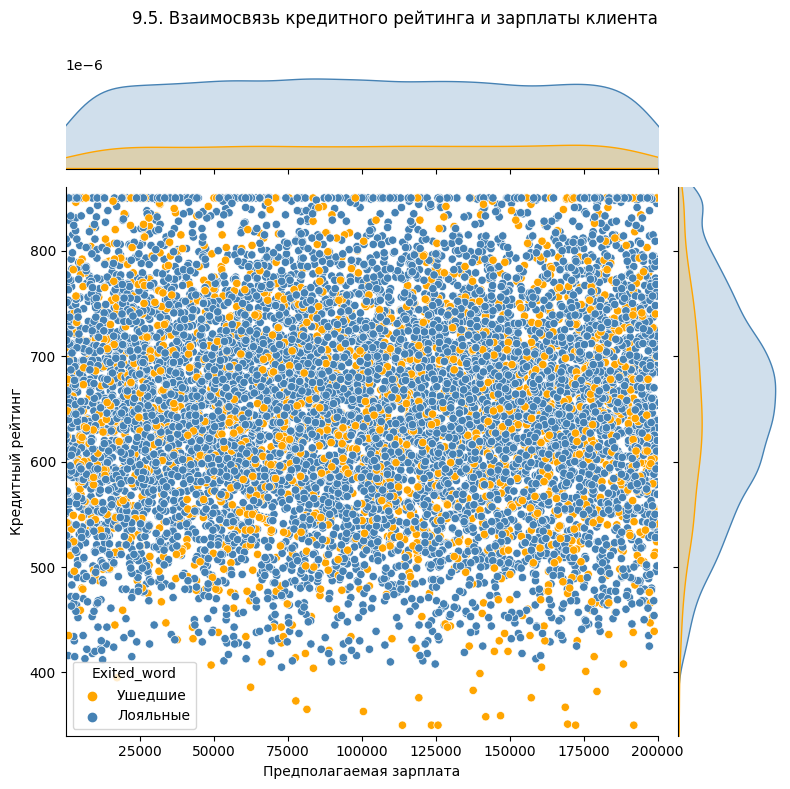

In [7]:
# Построим диаграмму рассеяния с гистограммой
jointplot = sns.jointplot(
    data=churn_df, 
    x='EstimatedSalary', 
    y='CreditScore',
    hue='Exited_word',
    xlim = (10, 200000),
    ylim = (340, 860),
    height=8,
    palette=['orange', 'steelblue']
)
jointplot.set_axis_labels('Предполагаемая зарплата', 'Кредитный рейтинг')
jointplot.fig.suptitle('9.5. Взаимосвязь кредитного рейтинга и зарплаты клиента')
jointplot.fig.subplots_adjust(top=0.9)

### Ответ на задание 9.5  
По графику невозможно проследить взаимосвязь между кредитным рейтингом клиента и его предполагаемой зарплатой. В этом есть логика: кредитный рейтинг не определяется одним лишь размером зарплаты, но зависит от множества факторов, среди которых такие, которые описывают, как клиент пользовался банковскими услугами в прошлом, например, брал ли он кредиты и как погашал задолженности. В этой связи стоит отметить, что низкий кредитный рейтинг (ниже 400 пунктов) встречается только у ушедших клиентов банка и не зависит от того, как долго клиент пользовался услугами банка (не показано на графике). Возможно, у этих клиентов были не самые лучшие "отношения" с банком, в результате чего банк понижал их рейтинг, а клиенты в конечном счете решили сменить банк. Либо такие клиенты с низким рейтингом сменили банк в надежде получить кредит, но, получив отказ, закрыли счет.  

Из вертикального распределения видно, что чуть больше, чем для половины клиентов банка характерен средний кредитный рейтинг (от 578 до 718). Это более выражено у выборки лояльных клиентов.  

Также среди лояльных клиентов намного чаще, чем среди ушедших, наблюдается наличие максимального кредитного рейтинга (вторая "горка" на вертикальном распределении в районе 850). Очевидно, что такие клиенты с удовольствием пользуются услугами банка, от чего и сохраняют ему свою лояльность, а банк в свою очередь доволен сотрудничеством с этими клиентами, в результате чего повышает их кредитный рейтинг.

---

## Задание 9.6  
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

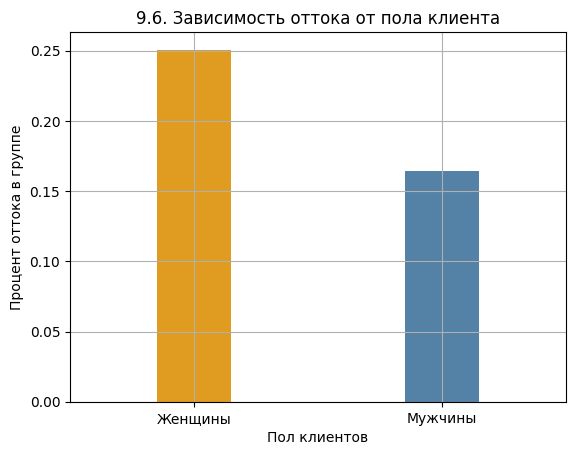

In [8]:
# Построим столбчатую диаграмму
barplot = sns.barplot(
    data=churn_df,
    x=churn_df['Gender'].apply(lambda x: 'Женщины' if x == 'Female' else 'Мужчины'),
    y='Exited',
    width=0.3,
    errorbar=None,
    palette=['orange', 'steelblue']
)
barplot.set_title('9.6. Зависимость оттока от пола клиента');
barplot.set_xlabel('Пол клиентов');
barplot.set_ylabel('Процент оттока в группе');
barplot.grid();

### Ответ на задание 9.6  
Как следует из графика, среди женщин наблюдается больший отток, чем среди мужчин: 25% всех клиентов-женщин покинули банк, тогда как у клиентов-мужчин показатель оттока составил 16%. Поэтому банку стоит уделить повышенное внимание женской аудитории с целью выявления причин их ухода и удержания.  

---

## Задание 9.7  
Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

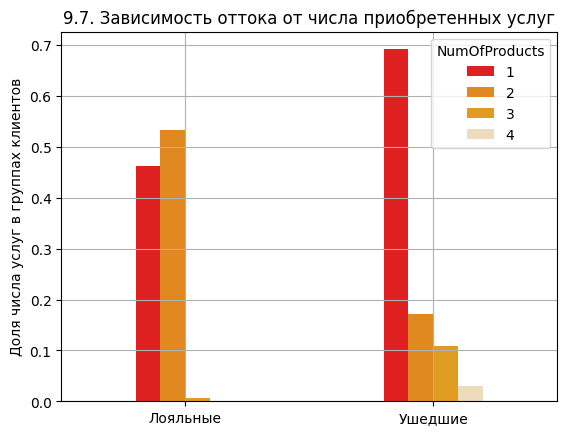

In [65]:
# Определим и сохраним в переменную доли клиентов с разным числом услуг, сгруппированные по признаку оттока
prod_churn = churn_df.groupby(['Exited_word'], as_index=False)['NumOfProducts'].value_counts(normalize=True)

# Построим многоуровневую столбчатую диаграммму
barplot = sns.barplot(
    data=prod_churn,
    x='Exited_word',
    y='proportion', # доли клиентов в каждой из лояльных групп
    hue='NumOfProducts',
    width=0.4,
    palette=['red', 'darkorange', 'orange', 'wheat']
)
barplot.set_title('9.7. Зависимость оттока от числа приобретенных услуг');
barplot.set_xlabel('');
barplot.set_ylabel('Доля числа услуг в группах клиентов');
barplot.grid();

### Ответ на задание 9.7  
На графике видно, что среди ушедших клиентов наибольшая часть (69%) пользовалась лишь одной услугой банка, а с ростом числа услуг процент оттока резко снижается: у 17% ушедших клиентов было две услуги, у 11% - 3 и у 3% - 4.

Гипотеза о влиянии количества используемых услуг банка на отток частично подтверждается левой частью графика, где представлены доли лояльных клиентов. (Обратите внимание, что это доли пользования услугами банка, а не процент оттока, т.к. среди лояльных клиентов нет ушедших.) Итак, можно заметить, что 46% лояльных клиентов банка пользуются одной услугой банка, а 53% - двумя. Тремя услугами пользуются менее 1% лояльных клиентов, и никто не пользуются четырьмя. Данное распределение подтверждает тот факт, что клиенты, которые хорошо знакомы с услугами банка и пользуются больше чем одной, более склонны сохранять лояльность банку.

Вместе с тем, увеличение количества используемых услуг вовсе не гарантирует сохранение лояльности. Это видно в левой части графика, где доли третьей и четвертой услуг ничтожны; а также в правой части, где все клиенты, которые пользовались четырьмя услугами, покинули банк. Однако будет ошибкой и считать, что с ростом числа услуг повышается шанс ухода из банка. Опровергает это предположение тот факт, что наибольшая часть ушедших клиентов пользовалась лишь одной услугой.

Очевидно, что для того, чтобы стать клиентом банка, нужно пользоваться хотя бы одной услугой. Это справедливо в том числе и для клиентов с плохим кредитным рейтином, которые покинули банк в течение первого года обслуживания. Рост числа используемых услуг связан, скорее всего, с размером баланса счета, финансовыми целями клиентов и продолжительностью обслуживания в банке. Так, состоятельные клиенты, вероятнее всего, могли пользоваться несколькими или всеми четырьмя услугами банка на протяжении всего времени сотрудничества с банком (накопления средств, инвестирования или выплаты кредита), а как только цель была достигнута, покинули банк. Вот почему мы видим более высокие доли использования третьей и четвертой услугой среди ушедших клиентов, чем среди лояльных.

Лояльные же клиенты, как видно из выводов в других заданиях, чаще представляют менее состоятельных клиентов банка, а потому довольствуются необходимыми базовыми услугами (первая и вторая) и редко или никогда используют более специфические третью и четвертую.

Таким образом, можно порекомендовать банку убедиться, что его клиенты знакомы со всем спектром предоставляемых услуг и пользуются как минимум двумя из них. Это будет способствовать повышению лояльности клиентов.  

---

## Задание 9.8  
Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

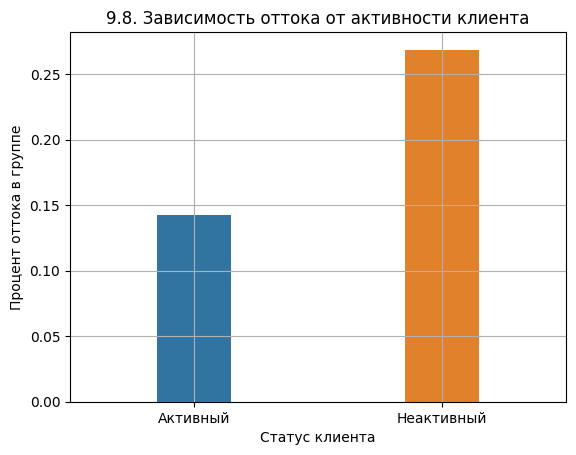

In [ ]:
# Построим столбчатую диаграмму
barplot = sns.barplot(
    data=churn_df,
    x=churn_df['IsActiveMember'].apply(lambda x: 'Неактивный' if x == 0 else 'Активный'),
    y='Exited',
    width=0.3,
    errorbar=None
)
barplot.set_title('9.8. Зависимость оттока от активности клиента');
barplot.set_xlabel('Статус клиента');
barplot.set_ylabel('Процент оттока в группе');
barplot.grid();

### Ответ на задание 9.8  
Среди активных клиентов банка процент ушедших составляет 14%, тогда как среди неактивных - 26%, что почти в два раза выше. Таким образом, банку следует стимулировать неактивных клиентов пользоваться продуктами и услугами банка для того, чтобы перевести их в статус активных и снизить вероятность ухода из банка. При этом, как мы видели из предыдущих исследований (задание 9.7), простое предложение дополнительных услуг (свыше двух) не обязательно гарантирует лояльность.

Опредение критериев активного клиента выходит за рамки данного проверочного задания (недоступно). В дополнение к сказанному выше о количестве услуг можно лишь добавить, что наличие кредитной карты, величина кредитного рейтинга и продолжительность пользования услугами банка не определяют активность клиента (это видно из дополнительного анализа, который не отражен на графике задания 9.8). Поэтому дать более конкретные рекомендации банку по повышению активности клиентов не представляется возможным. 

---

## Задание 9.9  
В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [ ]:
# Сформируем список стран и вычислим долю ушедших клиентов в каждой
countries = pd.Series(churn_df['Geography'].unique()).sort_values()
share = round(churn_df.groupby(['Geography'])['Exited'].mean(), 2)

# Построим тепловую картограмму
fig = px.choropleth(
    data_frame=churn_df, # исходный dataframe
    locations=countries, # список стран
    locationmode='country names', # режим сопоставления локаций с базой Plotly
    color=share, # зависимость цветовой заливки от доли ушедших клиентов
    range_color=[0, 0.5], # диапазон изменения цветовой гаммы
    title='9.9. Доля ушедших клиентов в разных странах', # название графика
    labels={'color': 'Доля ушедших клиентов', 'locations': 'Страна'}, # названия меток
    color_continuous_scale='Oranges', # цветовая схема
    projection='natural earth', # вид проекции Земли
    scope='europe', # регион Земли для представления на графике - Европа
    fitbounds='locations', # рамки графика - вмещает рассматриваемые страны
    width=800, # ширина графика
    height=600 # высота графика
)

fig.show()

![График 9.9 "Доля ушедших клиентов в разных странах"](images/countries_churn_share.png)

### Ответ на задание 9.9  
Как следует из тепловой картограммы, наибольшая доля ушедших клиентов приходится на Германию (32%), тогда как доли Испании и Франции вдвое меньше (17% и 16% соответственно). Можно предположить следующие основания для этого:  
1. Исходя из дополнительного анализа имеющихся данных (не представлен на теплокарте) можно увидеть, что средний возраст клиента в Германии составляет 40 лет, а во Франции и Испании - 39; средний баланс накопительного счета в Германии - $120 тыс., а во Франции и Испании - $62 тыс. В этой связи и с учетом выводов в задании 9.3. можно предположить, что именно в Германии клиенты банка накопили необходимую им сумму денег на своих счетах и вывели их со счета (на крупную покупку или для размещения в другом банке), либо погасили кредит и прекратили сотрудничество.  
2. Банк исторически является немецким, следовательно в этой стране его услугами пользуются давно - отсюда более высокий процент оттока. Расширение географии услуг банка во Францию и Испанию произошло относительно недавно, поэтому и процент оттока пока невелик (клиенты еще не успели накопить нужные суммы, либо процентные ставки и спектр услуг выгодно отличают данный банк от местных конкурентов).
3. Диаметрально противоположное предыдущему основание. Банк изначально пренадлежит французской или испанской финансовой группе, а потому более широко представлен в этих странах, чем в Германии. Отсюда - бОльшая популярность и лояльность, нежели в Германии, где клиенты склонны отдавать предпочтение немецким банкам. 
4. С учетом выводов к заданию 9.3, отрасли экономики, в которых задействованы немецкие клиенты банка, более развиты, чем отрасли клиентов из Франции и Испании, и позволяют им быстрее накапливать суммы на счетах и выводить на реализацию своих целей, а также погашать кредиты. Данное основание относится, скорее, к макроэкономическим факторам, нежели к условиям обслуживания в банке.  

---

## Задание 9.10   
Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.  

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.  

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.  

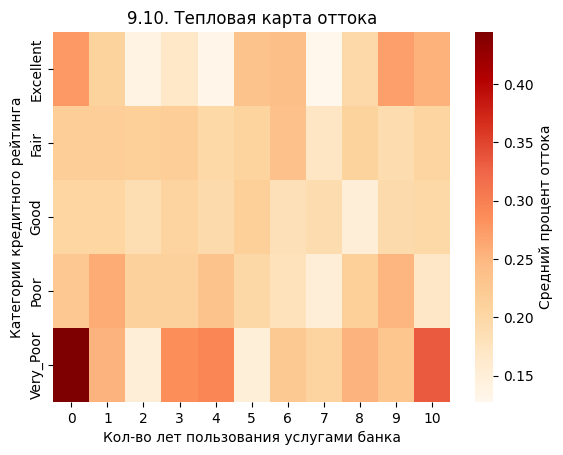

In [ ]:
# Напишем функцию преобразования числового признака в категориальный
# (код функции взят из задания)
def get_credit_score_cat(credit_score):
    ''' Фунция переводит числовой признак CreditScore
    в категориальный.

    Args:
        credit_score (int64): Значение кредитного рейтинга

    Returns:
        str: Название категории рейтинга

    '''

    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

# Добавим категориальный столбец, применив в каждому элементу фукцию выше
churn_df['CreditScoreCat'] = churn_df['CreditScore'].apply(get_credit_score_cat)

# Построим сводную таблицу
churn_pivot = churn_df.pivot_table(
    index='CreditScoreCat',
    columns='Tenure',
    values='Exited'
)

# Построим тепловую карту
heatmap = sns.heatmap(
    data=churn_pivot,
    cmap='OrRd',
    cbar_kws={'label':'Средний процент оттока'}
)

heatmap.set_title('9.10. Тепловая карта оттока');
heatmap.set_xlabel('Кол-во лет пользования услугами банка');
heatmap.set_ylabel('Категории кредитного рейтинга');

### Ответ на задание 9.10  
Как видно на тепловой карте, из всех категорий клиентов по признаку кредитного рейтинга чаще всего уходят из банка клиенты с самым низким рейтингом (Very_poor). Наиболее уязвимая с этой точки зрения - категория клиентов с низким рейтингом, которые пользуются услугами банка меньше одного года. Вероятно, это неблагополучные клиенты, имеющие плохую кредитную историю: они вынуждены менять банки, чтобы получить кредит или ссуду, и уходят, получив отказ.

Следом в этой же группе с низким рейтингом (Very_poor) числится категория клиентов, которые пользовались услугами банка на протяжении 10 лет. По всей видимости, они имели некую финансовую цель по накоплению и достигли ее, либо же с трудом выплатив полученный кредит закрыли счет.

Особо выделяются пониженным процентом оттока среди клиентов с низким рейтингом (Very_poor) те, кто оставался клиентами банка на протяжении 2 и 5 лет. Можно предположить, что это незначительная группа тех, кто имел небольшой кредит с горизонтом выплаты в 2 года или 5 лет, либо те, кому удалось досрочно погасить бОльший кредит в виду незапланированного изменения финансового положения, например, в результате выигрыша в лотерею или получения наследства.

Более равномерное распределение процента оттока наблюдается в категориях с рейтингами Poor, Good и Fair. Наибольшей "стабильностью" выделяется категория Good - клиенты со средним рейтингом, добропорядочные пользователи услуг, которые, вероятно, с годами повышают свой рейтинг, успешно достигая своих финансовых целей и/или исправно выплачивая кредит.

Наконец, в категории Excellent повышенный отток характерен для клиентов со "стажем" меньше года, а также в районе 5 и 10 лет. В первом случае объяснением может быть то, что состоятельный клиент, предприниматель, остро нуждающийся в заемных средствах для своего проекта, получает их, оборачивается в течение года и закрывает счет. Либо, как обусуждалось в ответе к заданию 9.3, клиенты с высоким кредитным рейтингом (а значит, с хорошей кредитной историей и пониманием, как работают банки, и чего от них ожидать), ознакомившись с услугами и сервисамм банка в течение первого года, нашли неудовлетворительным для себя уровень обслуживания, и покинули банк. Во втором случае (уход из банка спустя 5-6 и 9-10 лет) отток может объясняться горизонтом инвестирования: состоятельные клиенты (возможно и при посредничестве финансового советника банка) вложили средства в ценные бумаги и спустя намеченный срок (5 и 10 лет) приняли решение использовать накопленные средства для своих проектов и целей.

Таким образом, банку стоит обратить внимание на следующие категории клиентов, которые уходят чаще всего: это клиенты с самым низким и самым высоким кредитным рейтингом через 1, 3-5 и 10 лет пользования услугами банка.

---